In [89]:
import matplotlib
import pandas as pd

from sklearn.inspection import permutation_importance
from sklearn.utils.fixes import parse_version


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        if parse_version(matplotlib.__version__) >= parse_version("3.9")
        else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

In [90]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

breast_cancer = pd.read_excel('TrainDataset2024.xls')
y = breast_cancer['pCR (outcome)']
X = breast_cancer.drop(columns=['ID', 'RelapseFreeSurvival (outcome)', 'pCR (outcome)'])


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print(f"Baseline accuracy on test data: {clf.score(X_test, y_test)}")

Baseline accuracy on test data: 0.81


[0.01533891 0.00634199 0.00351943 0.00911803 0.00085394 0.0021936
 0.00950451 0.00087231 0.00132483 0.00242391 0.03543045 0.00960411
 0.01313605 0.00747686 0.00628667 0.00725324 0.01304688 0.00927676
 0.01135997 0.01159728 0.00978675 0.0115156  0.01023973 0.01077957
 0.00784272 0.00828512 0.01408438 0.01231145 0.0030107  0.01447197
 0.01062217 0.01395124 0.01160292 0.01260193 0.01092855 0.01081079
 0.01038847 0.01504558 0.00655724 0.01121535 0.01326406 0.00485385
 0.00925876 0.00588701 0.00464851 0.01049378 0.00422038 0.00501035
 0.00424019 0.0041381  0.00535809 0.00581742 0.0038575  0.0047281
 0.00385592 0.00453432 0.00816944 0.00713942 0.00348807 0.00387253
 0.00163561 0.00528173 0.00554542 0.00373866 0.00730733 0.00183387
 0.00394996 0.01013846 0.01402565 0.0090576  0.01109194 0.01373839
 0.00489098 0.00735392 0.01058108 0.00865205 0.01347097 0.00461454
 0.01245487 0.00994964 0.00967967 0.00819724 0.00498424 0.00569487
 0.00645026 0.01196268 0.01077676 0.01123437 0.005239   0.010295

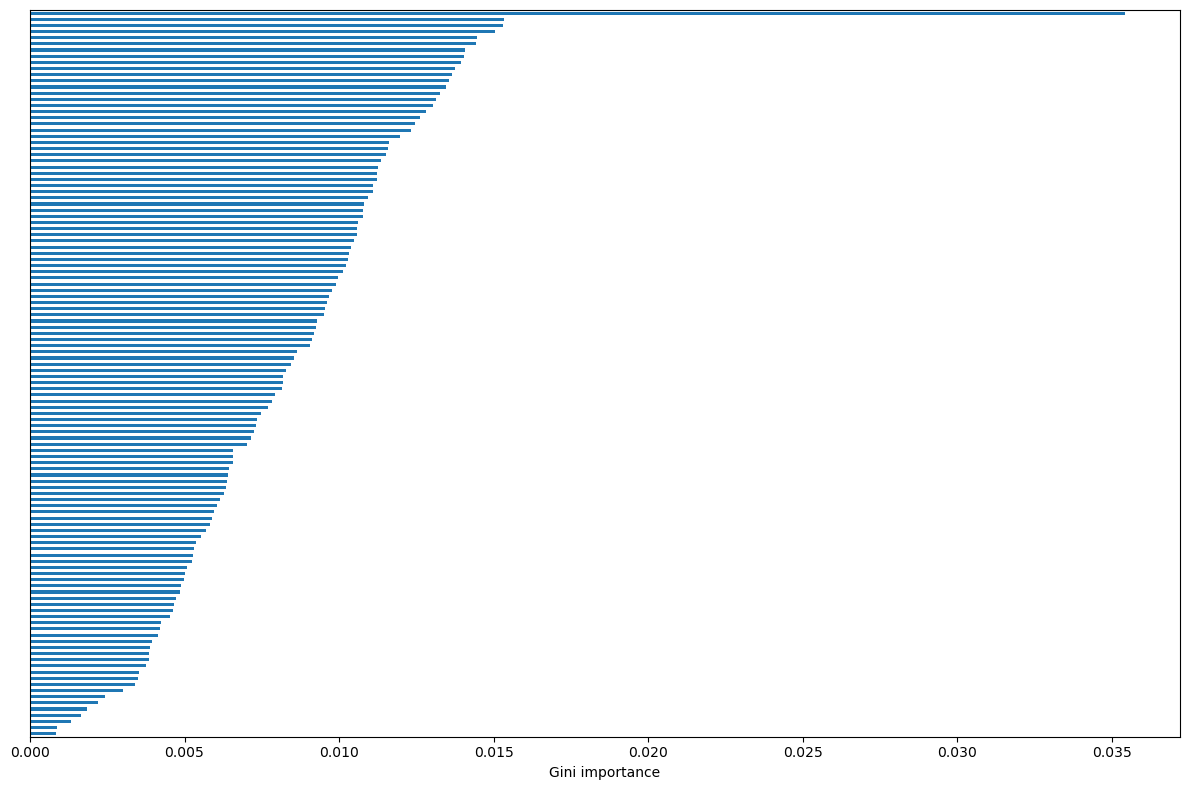

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)

print(clf.feature_importances_)

fig, ax = plt.subplots(1,figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax)
ax.get_yaxis().set_visible(False)
ax.set_xlabel("Gini importance")
#plot_permutation_importance(clf, X_train, y_train, ax2)
#ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()

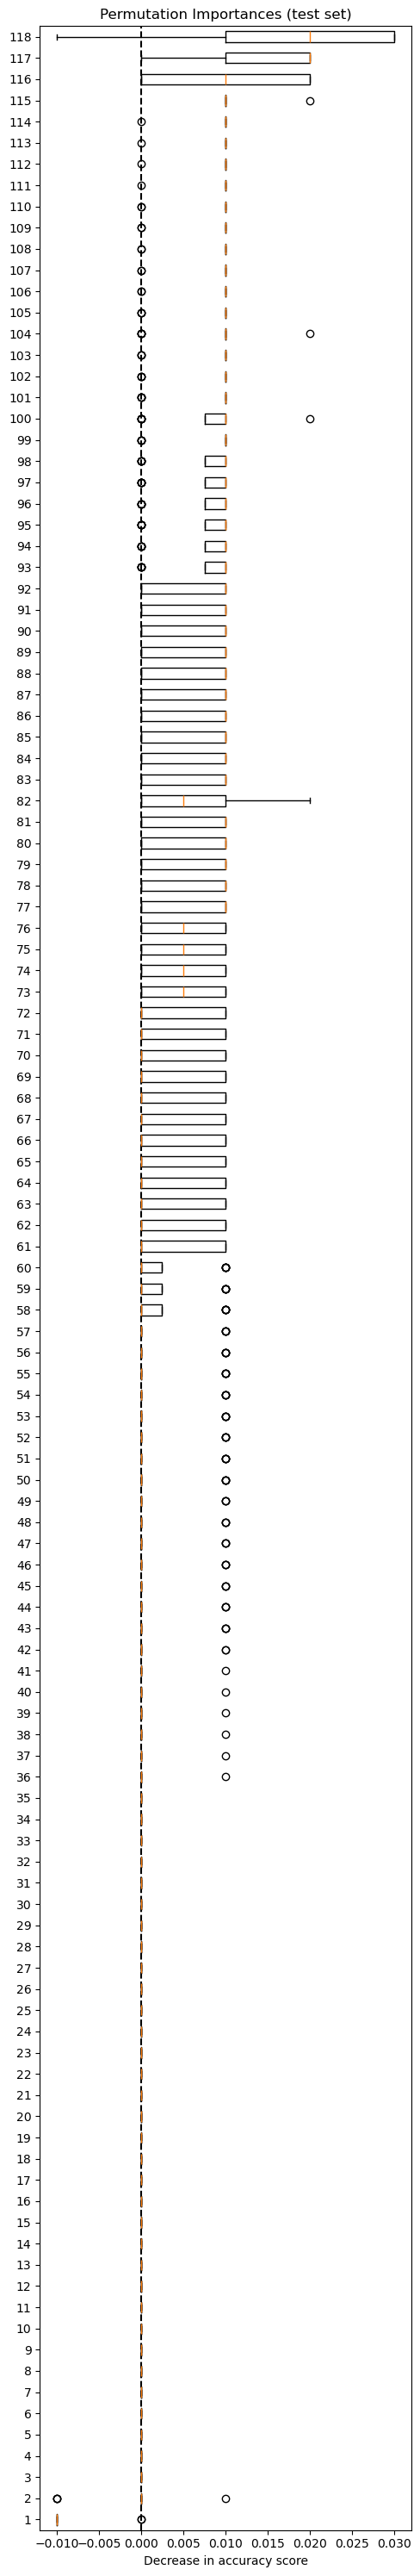

In [96]:
from sklearn.inspection import permutation_importance

result1 = permutation_importance(
    clf, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx = result1.importances_mean.argsort()
importances = pd.DataFrame(
    result1.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
fig, ax = plt.subplots()
fig.set_size_inches(5,30)
ax.boxplot(importances, vert=False)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

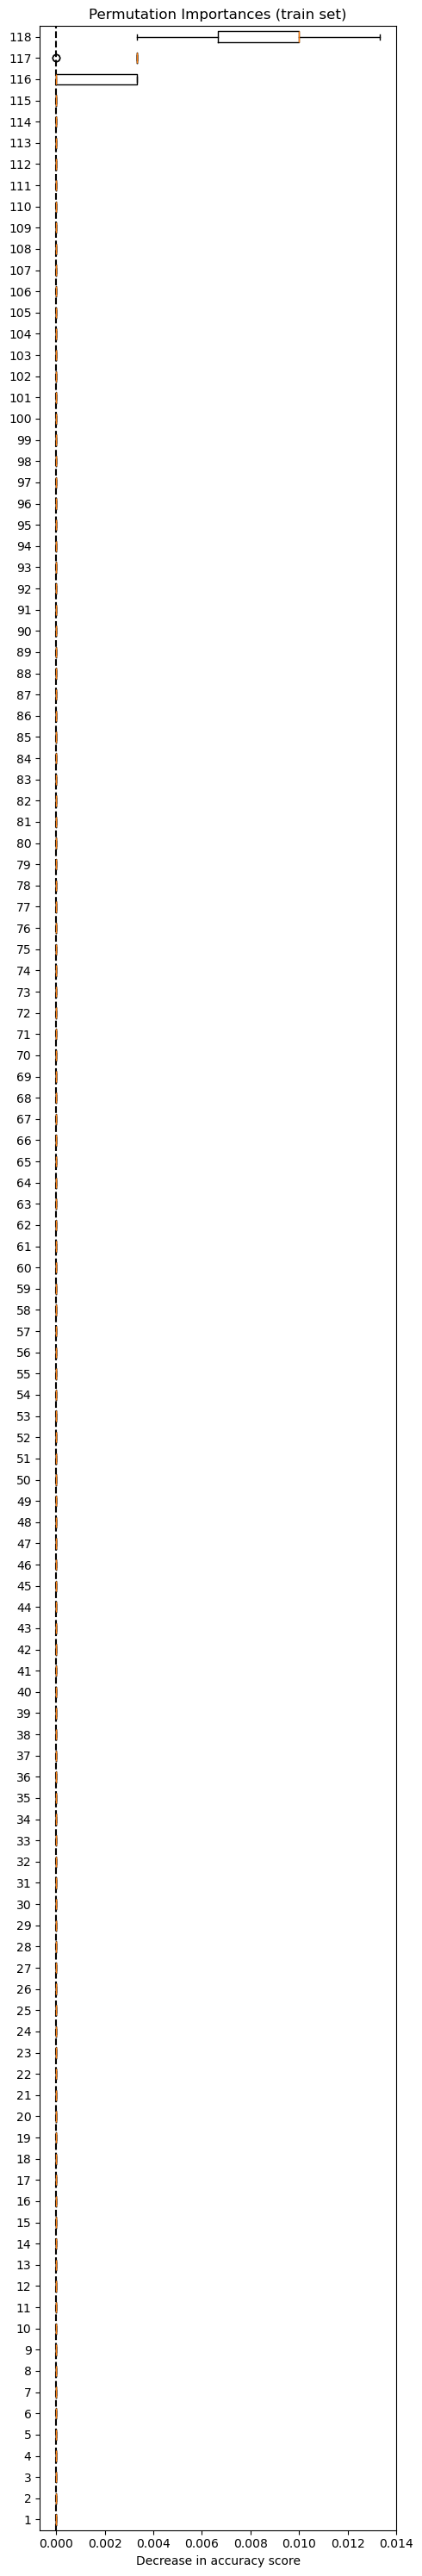

In [58]:
from sklearn.inspection import permutation_importance

result2 = permutation_importance(
    clf, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx = result2.importances_mean.argsort()
importances = pd.DataFrame(
    result2.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
fig, ax = plt.subplots()
fig.set_size_inches(5,30)
ax.boxplot(importances, vert=False)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

______________


In [26]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

categorical_columns = ["pclass", "sex", "embarked", "random_cat"]
numerical_columns = ["age", "sibsp", "parch", "fare", "random_num"]

X = X[categorical_columns + numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num', SimpleImputer(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.814


In [29]:
import pandas as pd

feature_names = rf[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

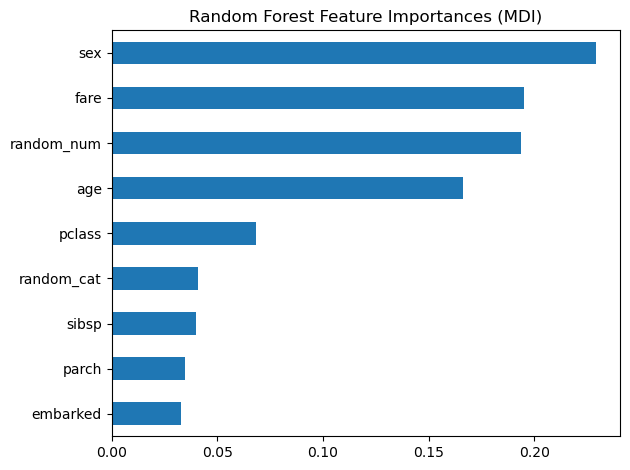

In [30]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

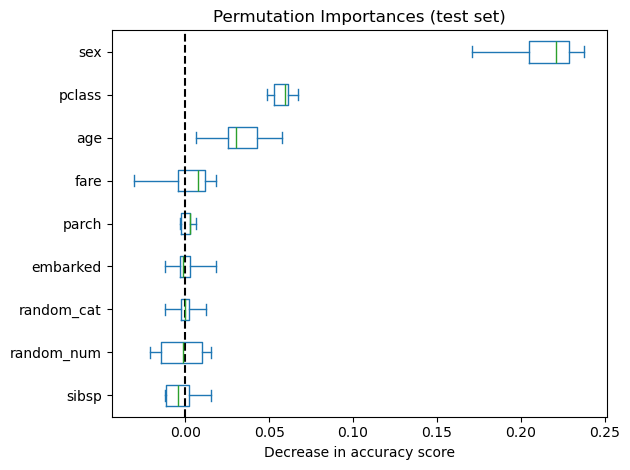

In [31]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

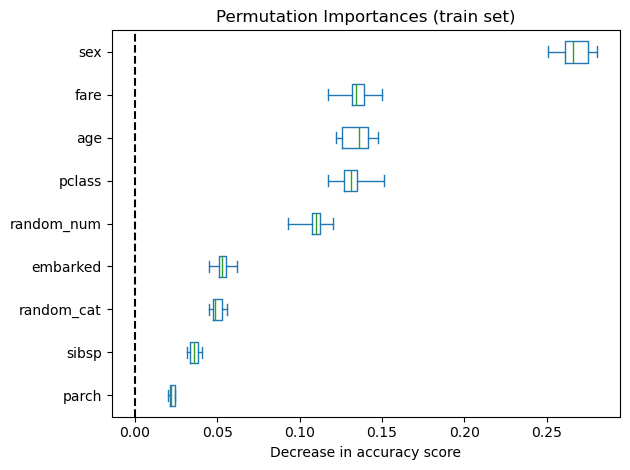

In [32]:
result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [33]:
rf.set_params(classifier__min_samples_leaf=20).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num', SimpleImputer(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=20, random_state=42))])

In [34]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 0.810
RF test accuracy: 0.832


In [35]:
train_result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

In [36]:
train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

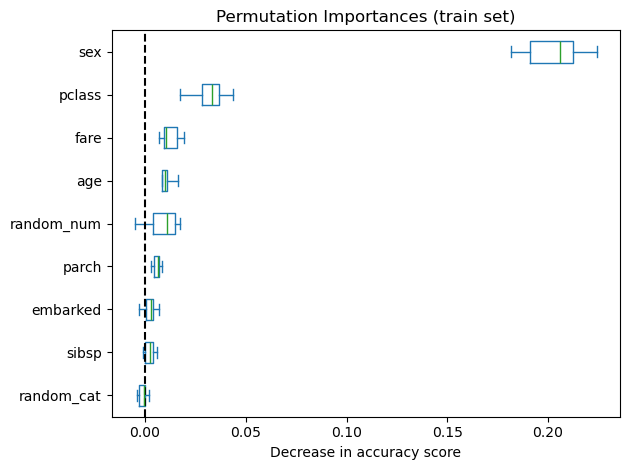

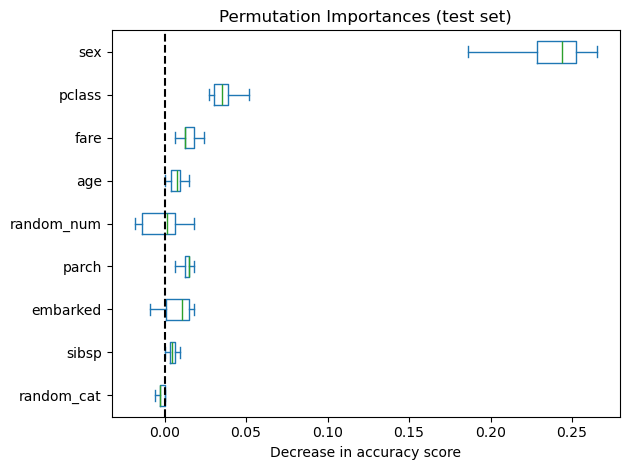

In [37]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()